In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import numpy as np
import torchvision
import torchvision.transforms as transforms

In [3]:
BATCH_SIZE = 64

transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.MNIST(root = './data', train = True, download = True, transform = transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size = BATCH_SIZE, shuffle = True, num_workers = 2)

testset = torchvision.datasets.MNIST(root = './data', train = False, download = True, transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size = BATCH_SIZE, shuffle = False, num_workers = 2)

0it [00:00, ?it/s]

9920512it [00:03, 2671637.53it/s]                             


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 58270.67it/s]                           
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:01, 853600.77it/s]                            
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 22028.57it/s]            

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


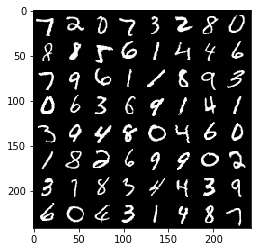

In [4]:
import matplotlib.pyplot as plt

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [0]:
class torchCNN(nn.Module):
    def __init__(self):
        super(torchCNN, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.conv3 = nn.Conv2d(16, 32, 3)
        self.fc1 = nn.Linear(1 * 1 * 32, 160)
        self.fc2 = nn.Linear(160, 100)
        self.fc3 = nn.Linear(100, 10)
        
    def forward(self, X):
        X = F.max_pool2d(self.conv1(X), (2, 2))
        X = F.max_pool2d(self.conv2(X), (2, 2))
        X = F.max_pool2d(self.conv3(X), (2, 2))
        X = X.view(-1, self.num_flat_features(X))
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return X
        
    def num_flat_features(self, X):
        num = 1
        size = X.size()[1:]
        for s in size:
            num *= s
        return num

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
model = torchCNN()
logits = model(images.view(-1, 1, 28, 28))
print (logits[0:10])

tensor([[-0.1513,  0.0585,  0.0704,  0.0350,  0.0018,  0.0755,  0.0425, -0.0349,
          0.0218, -0.0499],
        [-0.1502,  0.0573,  0.0711,  0.0365,  0.0008,  0.0802,  0.0388, -0.0323,
          0.0285, -0.0451],
        [-0.1538,  0.0566,  0.0697,  0.0397, -0.0027,  0.0728,  0.0336, -0.0322,
          0.0250, -0.0510],
        [-0.1501,  0.0579,  0.0696,  0.0370, -0.0004,  0.0740,  0.0381, -0.0308,
          0.0265, -0.0461],
        [-0.1595,  0.0548,  0.0719,  0.0463,  0.0018,  0.0737,  0.0338, -0.0332,
          0.0239, -0.0491],
        [-0.1600,  0.0564,  0.0698,  0.0426, -0.0044,  0.0745,  0.0412, -0.0380,
          0.0231, -0.0502],
        [-0.1484,  0.0588,  0.0671,  0.0373,  0.0012,  0.0756,  0.0359, -0.0316,
          0.0240, -0.0446],
        [-0.1531,  0.0600,  0.0687,  0.0381, -0.0004,  0.0715,  0.0409, -0.0331,
          0.0221, -0.0457],
        [-0.1624,  0.0580,  0.0714,  0.0402,  0.0024,  0.0736,  0.0413, -0.0360,
          0.0233, -0.0533],
        [-0.1523,  

In [0]:
device = 'cuda'

In [0]:
import torch.optim as optim

use_cuda = True

model = torchCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

def get_accuracy(logit, target, batch_size):
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects / batch_size
    return accuracy.item()

In [14]:
for epoch in range(10):
    train_running_loss = 0.0
    train_accuracy = 0.0
    model.train()
    
    for i, data in enumerate(trainloader):
        optimizer.zero_grad()
        
        inputs, labels = data
        
        inputs = inputs.view(-1, 1, 28, 28)
        logits = model(inputs)
        
        loss = criterion(logits, labels)
        
        loss.backward()
        optimizer.step()
        
        train_running_loss += loss.detach().item()
        train_accuracy += get_accuracy(logits, labels, BATCH_SIZE)
        
    model.eval()
    
    print ('Epoch:  %d | Loss: %.4f | Train Accuracy: %.2f'%(epoch, train_running_loss / i, train_accuracy/i))

Epoch:  0 | Loss: 0.2763 | Train Accuracy: 91.08
Epoch:  1 | Loss: 0.1577 | Train Accuracy: 95.10
Epoch:  2 | Loss: 0.1533 | Train Accuracy: 95.44
Epoch:  3 | Loss: 0.1478 | Train Accuracy: 95.75
Epoch:  4 | Loss: 0.1392 | Train Accuracy: 95.98
Epoch:  5 | Loss: 0.1456 | Train Accuracy: 95.94
Epoch:  6 | Loss: 0.1344 | Train Accuracy: 96.34
Epoch:  7 | Loss: 0.1267 | Train Accuracy: 96.46
Epoch:  8 | Loss: 0.1220 | Train Accuracy: 96.70
Epoch:  9 | Loss: 0.1276 | Train Accuracy: 96.61


In [15]:
test_acc = 0.0
for i, data in enumerate(testloader, 0):
    inputs, labels = data
    inputs = inputs.view(-1, 1, 28, 28)

    outputs = model(inputs)

    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)
        
print('Test Accuracy: %.2f'%( test_acc/i))

Test Accuracy: 96.35
